In [73]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
labels = pd.read_csv('./dataset/new/labels.csv')
labels

,Position,Aggregated,1,2,3,4,5,6,7
0,0,0,0,0,0,0.0,0.0,0.0,NaN
1,1,0,0,0,0,0.0,0.0,0.0,NaN
2,2,0,0,0,0,0.0,0.0,0.0,NaN
3,3,0,0,0,0,0.0,0.0,0.0,NaN
4,4,0,0,0,0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
119995,95,0,0,0,0,0.0,0.0,0.0,0.0
119996,96,0,0,0,0,0.0,0.0,0.0,0.0
119997,97,0,0,0,0,0.0,0.0,0.0,0.0
119998,98,0,0,0,0,0.0,0.0,0.0,0.0


In [75]:
def calculate_classified(labels: pd.DataFrame, precision_digits: int = 2):
    classified = []
    for index, r in labels[['1', '2', '3', '4', '5', '6', '7']].iterrows():
        #get rid on Nan to have really % of people classified, not the count of people divided by 7
        # not the same as number of annotators differs for each sample between 3 and 6
        row = r.dropna().to_numpy().tolist()
        # transform rows with 0's and some class label into 0's and 1's where it is labeled
        # is ok while we are guaranteed that only one of spicies is classified at each sample
    
        row = [1 if x != 0 else 0 for x in row]
    
        true_labeled = row.count(1)
        all_labeled = len(row)
    
        classified.append((true_labeled/all_labeled).__round__(precision_digits))
    return classified

In [76]:
labels['classified'] = calculate_classified(labels)

In [78]:
labels['agreement'] = 2*abs([0.5]*len(labels) - labels['classified'])

In [79]:
labels.sample(5)

,Position,Aggregated,1,2,3,4,5,6,7,classified,agreement
86458,58,0,0,5,0,0.0,0.0,0.0,NaN,0.17,0.66
93224,24,0,0,0,0,0.0,0.0,0.0,0.0,0.00,1.00
79039,39,0,0,0,0,0.0,0.0,0.0,0.0,0.00,1.00
58274,74,6,6,6,6,6.0,6.0,6.0,NaN,1.00,1.00
98249,49,5,5,5,0,0.0,5.0,NaN,NaN,0.60,0.20


# Agreement plots

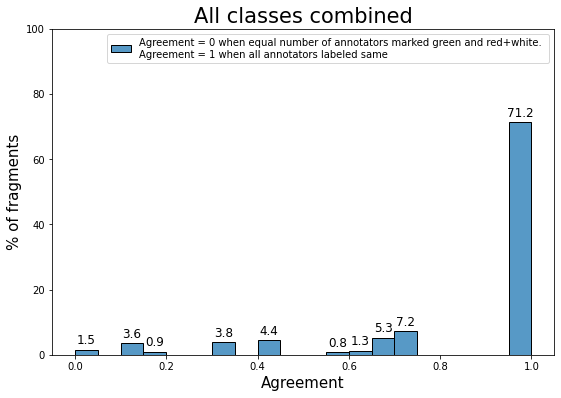

In [81]:
plt.figure(figsize=(9,6))
agr_label = """Agreement = 0 when equal number of annotators marked green and red+white. 
Agreement = 1 when all annotators labeled same"""

ax = sns.histplot(data=labels, x="agreement", stat='percent', element="bars", bins=20, label=agr_label)

for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=12, padding=3)
ax.set_title("All classes combined", size=21)
ax.set_xlabel("Agreement", size=15)
ax.set_ylabel("% of fragments", size=15)
ax.legend()
ax.set_ylim(0,100)
plt.show()

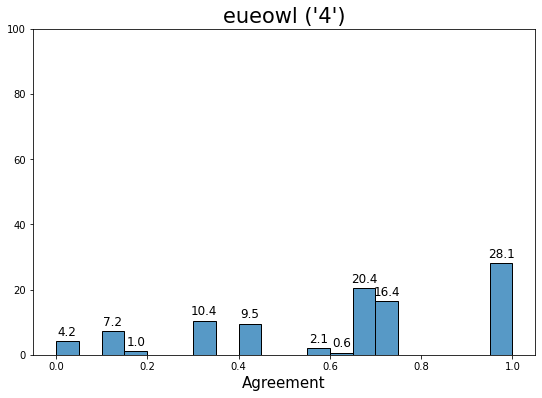

In [67]:
labels_folder = pd.read_csv('./dataset/new/' + 'eueowl1' + '_labels.csv')
labels_folder['classified'] = calculate_classified(labels_folder)
labels_folder['agreement'] = 2*abs([0.5]*len(labels_folder) - labels_folder['classified'])

plt.figure(figsize=(9,6))
agr_label = """Agreement = 0 when equal number of annotators marked green and red+white. 
Agreement = 1 when all annotators labeled same"""

ax = sns.histplot(data=labels_folder[labels_folder.classified != 0], x="agreement", stat='percent', element="bars", bins=20, label=agr_label)

for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=12, padding=3)
ax.set_title("eueowl ('4')", size=21)
ax.set_xlabel("Agreement", size=15)
ax.set_ylabel("")
#ax.legend()
ax.set_ylim(0,100)
plt.show()

# Green ratio

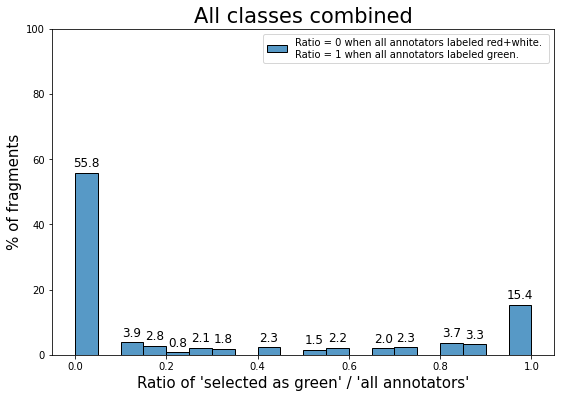

In [72]:
plt.figure(figsize=(9,6))
agr_label = """Ratio = 0 when all annotators labeled red+white. 
Ratio = 1 when all annotators labeled green."""
ax = sns.histplot(data=labels, x="classified", stat='percent', element="bars", bins=20, label=agr_label)

for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=12, padding=3)
ax.set_title("All classes combined", size=21)
ax.set_xlabel("Ratio of 'selected as green' / 'all annotators'", size=15)
ax.set_ylabel("% of fragments", size=15)
ax.legend()
ax.set_ylim(0,100)
plt.show()

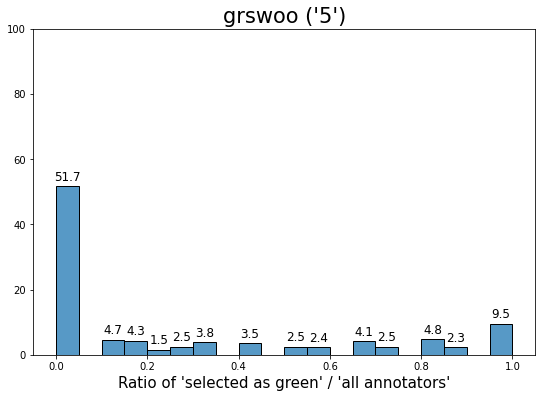

In [83]:
labels_folder = pd.read_csv('./dataset/new/' + 'grswoo' + '_labels.csv')
labels_folder['classified'] = calculate_classified(labels_folder)
labels_folder['agreement'] = 2*abs([0.5]*len(labels_folder) - labels_folder['classified'])

plt.figure(figsize=(9,6))
agr_label = """Agreement = 0 when equal number of annotators marked green and red+white. 
Agreement = 1 when all annotators labeled same"""

ax = sns.histplot(data=labels_folder, x="classified", stat='percent', element="bars", bins=20, label=agr_label)

for container in ax.containers:
    
    # customize the label to account for cases when there might not be a bar section
    bar_labels = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
    
    # set the bar label
    ax.bar_label(container, labels=bar_labels, fontsize=12, padding=3)
ax.set_title("grswoo ('5')", size=21)
ax.set_xlabel("Ratio of 'selected as green' / 'all annotators'", size=15)
ax.set_ylabel("")
#ax.legend()
ax.set_ylim(0,100)
plt.show()

# Green ratio vs Agreement
<br>
Comparison plots to see that agreeing on bird absence and a lot of fragments without a bird are main sources of ~70% completely agreement on average.

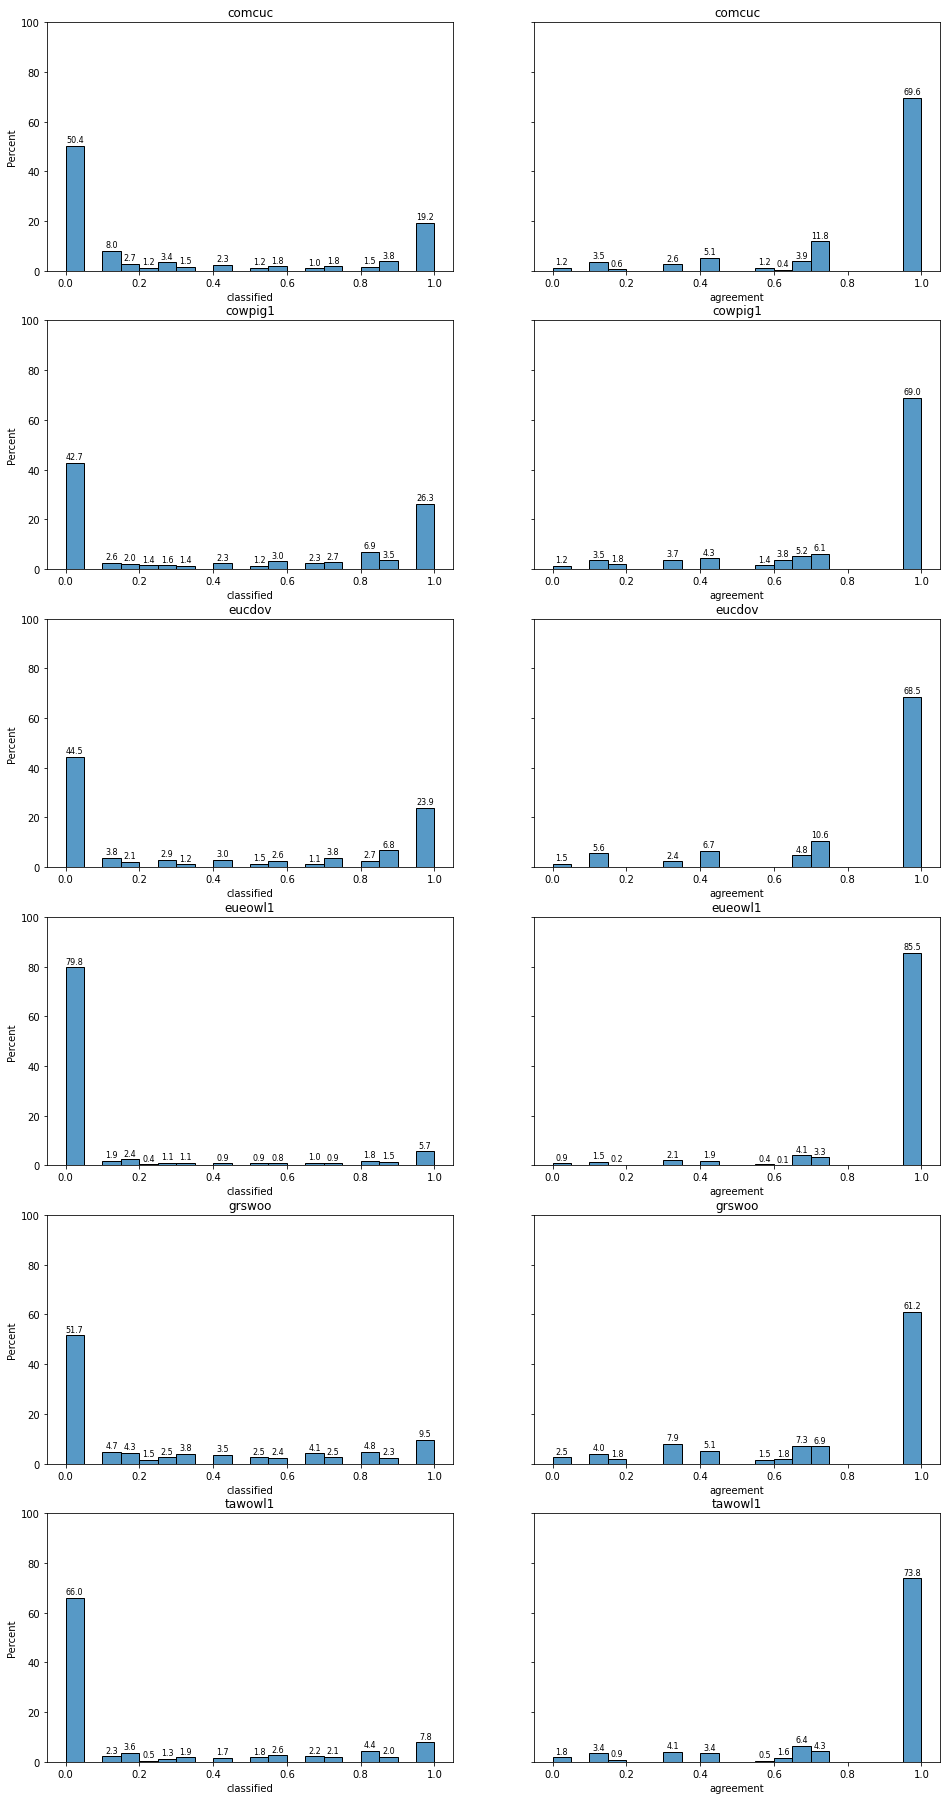

In [84]:
folders = ["comcuc", "cowpig1", "eucdov", "eueowl1", "grswoo", "tawowl1"]
fig, axes = plt.subplots(6, 2, sharey=True, figsize=(16, 32))
for i, folder in enumerate(folders):
    labels_folder = pd.read_csv('./dataset/new/' + folder + '_labels.csv')
    labels_folder['classified'] = calculate_classified(labels_folder)
    labels_folder['agreement'] = 2*abs([0.5]*len(labels_folder) - labels_folder['classified'])
    ax = sns.histplot(ax=axes[i%6, 0], data=labels_folder, x="classified", stat='percent', element="bars", bins=20)
    
    for container in ax.containers:
        # customize the label to account for cases when there might not be a bar section
        ls = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
        # set the bar label
        ax.bar_label(container, labels=ls, fontsize=8, padding=1.5)
        
    ax.set_ylim(0,100)
    ax.set(title=folder)
    
    ax = sns.histplot(ax=axes[i%6, 1], data=labels_folder, x="agreement", stat='percent', element="bars", bins=20)
    
    for container in ax.containers:
        # customize the label to account for cases when there might not be a bar section
        ls = [f'{h:0.1f}' if (h := v.get_height()) != 0 else '' for v in container ]
        # set the bar label
        ax.bar_label(container, labels=ls, fontsize=8, padding=1.5)
        
    ax.set_ylim(0,100)
    ax.set(title=folder)



# Aggregating labels
Note: Provided prior aggregated label is received by majority vote = thresholding on classified > 0.5 

In [118]:
# Falses are caused only by NaN
print((labels.loc[labels['Aggregated'] != 0] == labels.loc[labels['classified'] > 0.5]).all())
if len(labels.loc[(labels['Aggregated'] != 0) & (labels['classified'] > 0.5)])/len(labels.loc[(labels['Aggregated'] != 0)]) == 1:
    print("Same legth")

Position        True
Aggregated      True
1               True
2               True
3               True
                ... 
0.35_thresho    True
0.6_thresho     True
0.7_thresho     True
0.85_thresho    True
0.95_thresho    True
Length: 62, dtype: bool
Same legth


For future benefit (to make artificially data less unbalanced) we might wanna use other threshold. <br>
1) Assuming there are more FN than FP -> lower threshold. <br>
2) Assuming there are more FP than FN -> greater threshold. <br>
<br>
Possible reasoning: <br>
for (1): people stopped the frame too early or started too late, causing FN on the border between call and spaces.<br>
for (2): people selected multiple calls with one green frame, causing a lot of FP (spaces in between calls).